In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['malicious-and-benign-websites']


In [2]:
df = pd.read_csv('../input/malicious-and-benign-websites/dataset.csv')
df.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1


**Discover the dataset**

In [3]:
df.shape

(1781, 21)

In [4]:
df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [5]:
print(df.isnull().sum())
df[pd.isnull(df).any(axis=1)]

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1
10,B0_1013,20,6,utf-8,Apache,NaN,US,Kansas,14/09/2007 0:00,9/09/2015 0:00,...,0,0,0,0,0,0,0,0,0.0,0
20,B0_161,22,6,utf-8,openresty/1.11.2.1,NaN,US,CA,3/07/1999 0:00,7/08/2015 0:00,...,29,6,3833,43,42,22495,4125,43,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,M4_39,178,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1775,M4_45,194,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1


CONTENT_LENGTH has 812 NaN.

In [6]:
df = df.interpolate()
print(df.isnull().sum())

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [7]:
#Charset
df['CHARSET'].unique()
df['CHARSET']=np.where(df['CHARSET'] =='iso-8859-1', 'ISO-8859-1', df['CHARSET'])
df['CHARSET']=np.where(df['CHARSET'] =='utf-8', 'UTF-8', df['CHARSET'])

In [8]:
#WHOIS_COUNTRY 
df['WHOIS_COUNTRY'].unique()
df['WHOIS_COUNTRY']=np.where(df['WHOIS_COUNTRY'] =='United Kingdom', 'UK', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY']=np.where(df['WHOIS_COUNTRY'] =="[u'GB'; u'UK']", 'UK', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY']=np.where(df['WHOIS_COUNTRY'] =='United Kingdom', 'UK', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY']=np.where(df['WHOIS_COUNTRY'] =='us', 'US', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY']=np.where(df['WHOIS_COUNTRY'] =='se', 'SE', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY']=np.where(df['WHOIS_COUNTRY'] =='ru', 'RU', df['WHOIS_COUNTRY'])

In [9]:
df.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,1781.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1781.000000,1781.000000
unique,1781,NaN,NaN,7,239,NaN,44,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_770,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,1055,386,NaN,1106,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,13497.243964,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263335,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,38415.552697,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930036,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,603.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,4714.750000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,12578.500000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [10]:
#How many URLs are malicious?
df['Type'].value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [11]:
df.groupby('Type').mean()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
Type,,,,,,,,,,,,,
0,55.302236,10.637061,12954.208405,16.865815,6.144409,3.159744,3216.795527,19.072204,19.313099,17030.366773,3384.692652,19.072204,2.188498
1,68.981481,14.550926,17431.737717,11.879630,0.606481,2.342593,1283.615741,14.685185,14.638889,7648.611111,1495.726852,14.685185,2.805556


In [12]:
df.groupby('Type').median()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
Type,,,,,,,,,,,,,
0,50.0,10.0,4912.7500,7.0,1.0,2.0,632.0,8.0,8.0,562.0,672.0,8.0,0.0
1,49.0,12.0,3074.8375,8.0,0.0,2.0,810.0,11.0,10.0,1179.5,1002.5,11.0,2.0


In [13]:
df.groupby(['CHARSET','Type']).count()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  SERVER  \
CHARSET      Type                                                       
ISO-8859     0       1           1                          1       1   
ISO-8859-1   0     503         503                        503     503   
             1      58          58                         58      58   
None         0       6           6                          6       6   
             1       1           1                          1       1   
UTF-8        0     903         903                        903     902   
             1     152         152                        152     152   
us-ascii     0     151         151                        151     151   
             1       4           4                          4       4   
windows-1251 1       1           1                          1       1   
windows-1252 0       1           1                          1       1   

                   CONTENT_LENGTH  WHOIS_COUNTRY  WHOIS_STATEPRO  \
CHARSET      Type                                                  
ISO-8859     0                  1              1               1   
ISO-8859-1   0                503            503             503   
             1                 58             58              58   
None         0                  6              6               6   
             1                  1              1               1   
UTF-8        0                903            903             903   
             1                152            152             152   
us-ascii     0                151            151             151   
             1                  4              4               4   
windows-1251 1                  1              1               1   
windows-1252 0                  1              1               1   

                   WHOIS_REGDATE  WHOIS_UPDATED_DATE  \
CHARSET      Type                                      
ISO-8859     0                 1                   1   
ISO-8859-1   0               503                 503   
             1                58                  58   
None         0                 6                   6   
             1                 1                   1   
UTF-8        0               903                 903   
             1               152                 152   
us-ascii     0               151                 151   
             1                 4                   4   
windows-1251 1                 1                   1   
windows-1252 0                 1                   1   

                   TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  \
CHARSET      Type                                                    
ISO-8859     0                             1                     1   
ISO-8859-1   0                           503                   503   
             1                            58                    58   
None         0                             6                     6   
             1                             1                     1   
UTF-8        0                           903                   903   
             1                           152                   152   
us-ascii     0                           151                   151   
             1                             4                     4   
windows-1251 1                             1                     1   
windows-1252 0                             1                     1   

                   REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
CHARSET      Type                                              
ISO-8859     0              1          1                   1   
ISO-8859-1   0            503        503                 503   
             1             58         58                  58   
None         0              6          6                   6   
             1              1          1                   1   
UTF-8        0            903        903                 903   
             1            152   

In [14]:
df.groupby(['WHOIS_COUNTRY','Type']).count()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  \
WHOIS_COUNTRY Type                                                         
AE            0        1           1                          1        1   
AT            0        4           4                          4        4   
AU            0       35          35                         35       35   
BE            0        3           3                          3        3   
BR            1        2           2                          2        2   
BS            0        4           4                          4        4   
BY            0        1           1                          1        1   
CA            0       82          82                         82       82   
              1        2           2                          2        2   
CH            0        6           6                          6        6   
CN            0        7           7                          7        7   
              1        3           3                          3        3   
CZ            0        1           1                          1        1   
              1        8           8                          8        8   
Cyprus        0        2           2                          2        2   
DE            0        2           2                          2        2   
              1        1           1                          1        1   
ES            0        1           1                          1        1   
              1       62          62                         62       62   
FR            0        8           8                          8        8   
              1        1           1                          1        1   
GB            0       15          15                         15       15   
              1        4           4                          4        4   
HK            0        3           3                          3        3   
IE            0        1           1                          1        1   
IL            0        2           2                          2        2   
IN            0        9           9                          9        9   
              1        1           1                          1        1   
IT            0        1           1                          1        1   
JP            0       11          11                         11       11   
KG            0        2           2                          2        2   
KR            0        3           3                          3        3   
              1        2           2                          2        2   
KY            0        3           3                          3        3   
LU            0        1           1                          1        1   
LV            0        1           1                          1        1   
NL            0        6           6                          6        6   
NO            0        2           2                          2        2   
None          0      241         241                        241      241   
              1       65          65                         65       65   
PA            0       19          19                         19       19   
              1        2           2                          2        2   
PH            0        4           4                          4        4   
PK            1        1           1                          1        1   
RU            1        6           6                          6        6   
SC            0        3           3                          3        3   
SE            0        4           4                          4        4   
SI            0        2           2                          2        2   
TH            0        1           1                          1        1   
TR            0        3           3                          3        3   
UA            1        2           2                          2      

**Find important factors**

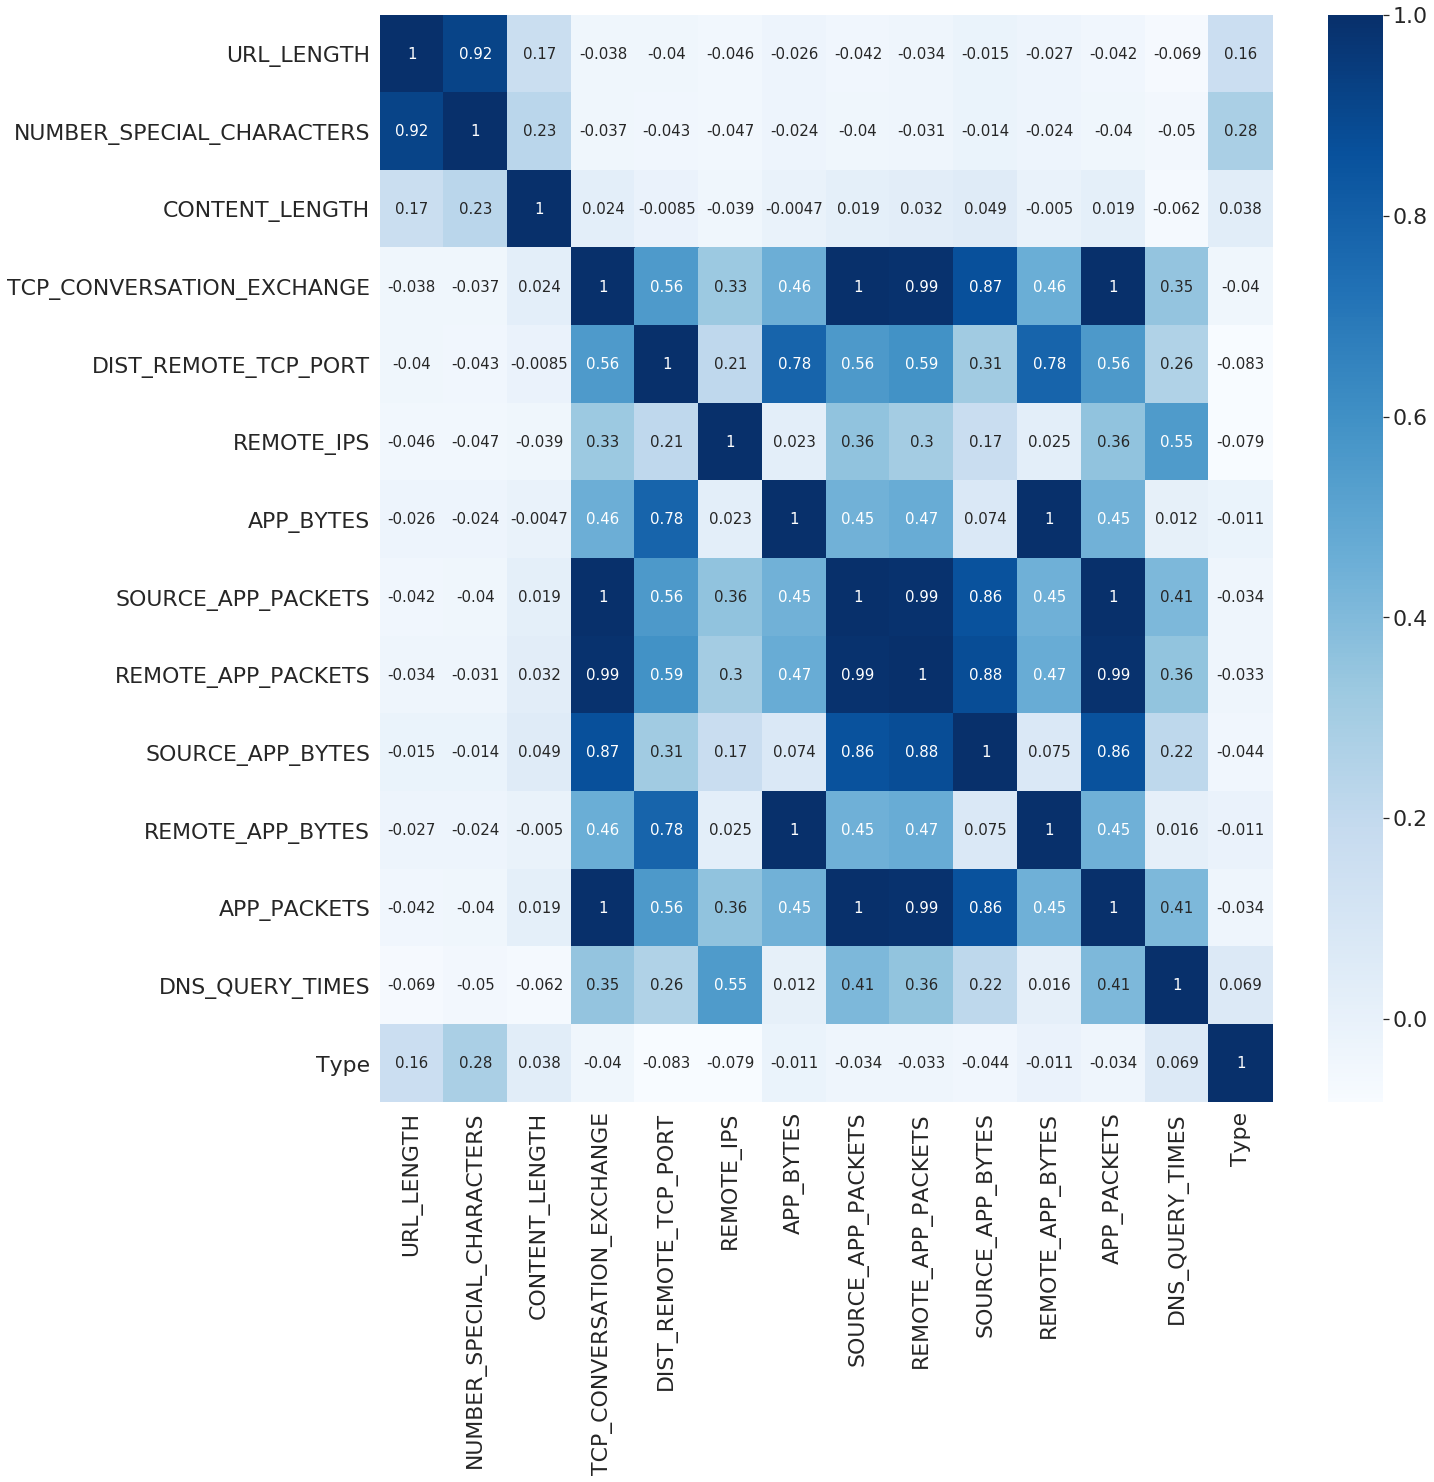

In [15]:
correlation = df.corr()
plt.figure(figsize = (20, 20))
sns.set(font_scale = 2)
sns.heatmap(correlation, annot = True, annot_kws = {'size': 15}, cmap = 'Blues')

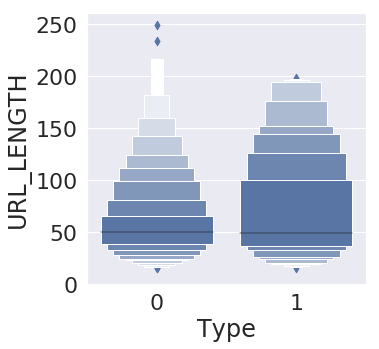

In [16]:
#Type x URL Length
plt.figure(figsize=(5, 5))
sns.boxenplot(data = df, x="Type", y="URL_LENGTH",
              color="b", scale="linear")

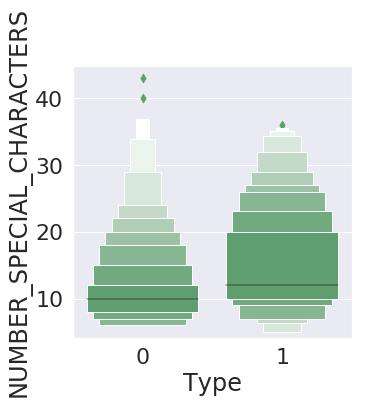

In [17]:
#Type x Number of Special Characters
plt.figure(figsize=(5, 5))
sns.boxenplot(data = df, x="Type", y="NUMBER_SPECIAL_CHARACTERS",
              color="g", scale="linear")

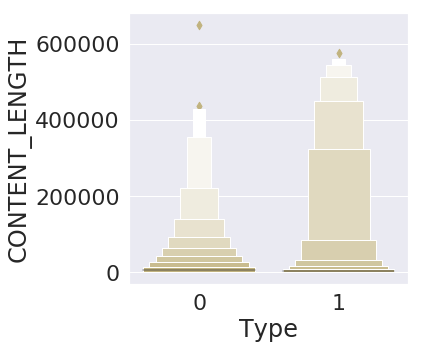

In [18]:
#Type x Content Length
plt.figure(figsize=(5, 5))
sns.boxenplot(data = df, x="Type", y="CONTENT_LENGTH",
              color="y", scale="linear")

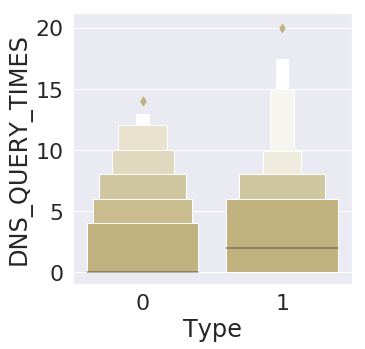

In [19]:
#Type x DNS Query Times
plt.figure(figsize=(5, 5))
sns.boxenplot(data = df, x="Type", y="DNS_QUERY_TIMES",
              color="y", scale="linear")

**Logistic Regression**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS','DNS_QUERY_TIMES']]
y = df['Type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [21]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print (X_test) 
print (y_pred)

      URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  DNS_QUERY_TIMES
1337          68                         14              4.0
1411          72                         12              4.0
1182          59                         12              4.0
962           52                         12              0.0
1739         132                         27              0.0
...          ...                        ...              ...
372           37                          8              0.0
1389          71                         12              6.0
1529          83                         13              4.0
211           32                          8              4.0
1620          99                         20              0.0

[446 rows x 3 columns]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

In [22]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_regression.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


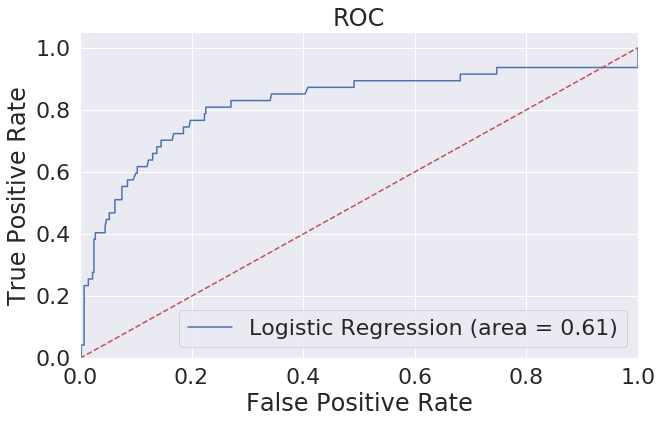

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Since AUC = 0.61, this model is predictable.